<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #a46b51; color :#fffae6  ; text-align: center; border-radius: 5px 5px; padding: 7px">Table of Contents</h2>

   #### [1. Dataset Introduction](#1)
   #### [2. Data Preparation](#2)
   #### [3. Model Training](#3)
   #### [4. Model Evaluation](#4)
   #### [5. Model Deployment](#5)


<a id="1"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #a46b51; color :#ffefe5   ; text-align: center; border-radius: 5px 5px; padding: 7px">1. Dataset Introduction</h2>

#### Amazon Fine Food Reviews
#### Source : https://www.kaggle.com/snap/amazon-fine-food-reviews

<b>Description </b><br>
<b>
    This dataset consists of reviews of fine foods from amazon.
    The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review.It also includes reviews from all other Amazon categories.<br><br>

<b>Data includes :</b><br>
   - Reviews from Oct 1999 - Oct 2012<br>
   - 568,454 reviews<br>
   - 256,059 users<br>
   - 74,258 products<br>


<b>Attributes :</b><br>
   - ProductId : Unique identifier for the product<br>
   - <b>UserId</b> : Unqiue identifier for the user<br>
   - <b>ProfileName</b> : Name of customer<br>
   - <b>HelpfulnessNumerator</b> : Number of users who found the review helpful<br>
   - <b>HelpfulnessDenominator</b> : Number of users who indicated whether they found the review helpful or not<br>
   - <b>Score</b> : Rating between 1 and 5<br>
   - <b>Time</b> : Timestamp for the review<br>
   - <b>Summary</b> : Brief summary of the review<br>
   - <b>Text</b> : Review text
  
</p>

<a id="2"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #a46b51; color :#fffae6   ; text-align: center; border-radius: 5px 5px; padding: 7px">2. Data Preprocessing</h2>

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

import string
import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , LSTM , Embedding
from keras.models import Sequential
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

### Load data

In [ ]:
data = pd.read_csv(r"C:\Users\afrin\Documents\Amazon Fine Food Reviews\data\raw\Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.shape

(568454, 10)

In [4]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

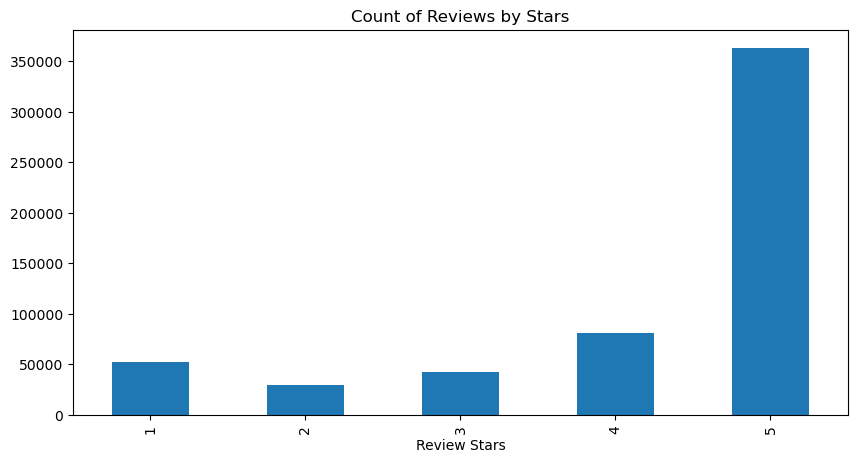

In [5]:
ax = data['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by Stars', figsize = (10, 5))
ax.set_xlabel('Review Stars')
plt.show()

<h2 style = "font-size:25px; font-family:Livvic ; font-weight : bold; background-color: #a46b51; color :#fffae6   ; text-align: center; border-radius: 5px 5px; padding: 5px">Data cleaning</h2>

### Handling missing values

In [6]:
# Check null values
data.isna().sum().to_frame(name = 'Total of missing values')

,Total of missing values
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


### Remove rows which are having null values

In [7]:
total_rows =  data.shape[0]
data.dropna(how = 'any', inplace = True)
remaining_rows = data.shape[0]

removed_rows = total_rows - remaining_rows
print("No. of rows removed:", removed_rows)

print(f"\nPercentage of data removed:{np.round ((removed_rows / total_rows)*100, 2)} %")
print(f"Percentage of data remaining:{np.round ((remaining_rows / total_rows)*100, 2)} %")

No. of rows removed: 53

Percentage of data removed:0.01 %
Percentage of data remaining:99.99 %


### Remove duplicate rows

In [8]:
a =  data.shape[0]
data.drop_duplicates(inplace = True, subset = ['Score','Text'])
b = data.shape[0]

print("No. of rows removed:", a - b)

print(f"\nPercentage of data removed: {np.round (((a - b) / total_rows)*100, 2)} %")
print(f"Percentage of data remaining: {np.round ((b / total_rows)*100, 2)} %")

No. of rows removed: 174745

Percentage of data removed: 30.74 %
Percentage of data remaining: 69.25 %


### Remove outliers

In [9]:
a =  data.shape[0]

idx = data[data["HelpfulnessNumerator"] > data["HelpfulnessDenominator"]].index
data.drop(index = idx, inplace = True)

b = data.shape[0]

print("No. of rows removed:", a - b)

print(f"\nPercentage of data removed:{np.round(((a - b) / total_rows)*100, 2)} %")
print(f"Percentage of data remaining:{np.round((b / total_rows)*100, 2)} %")

No. of rows removed: 2

Percentage of data removed:0.0 %
Percentage of data remaining:69.25 %


### Create target column using Score

In [10]:
## `Score` > 3 : "Positive" 
## `Score` == 3 : "Neutral"
## `Score` < 3 : "Negative"

def create_target(x):
    return "Positive" if x > 3 else "Negative" if x < 3 else "Neutral"

data['target'] = data['Score'].apply(create_target)

data = data[data['target'] != 'Neutral']

In [11]:
# 'target' column
data[['Score', 'target']].sample(5)

,Score,target
206095,2,Negative
55892,5,Positive
120264,5,Positive
136042,2,Negative
91858,4,Positive


<h2 style = "font-size:25px; font-family:Livvic ; font-weight : bold; background-color: #a46b51; color :#fffae6   ; text-align: center; border-radius: 5px 5px; padding: 5px">Handling class imbalance</h2>

### Target distribution (before)

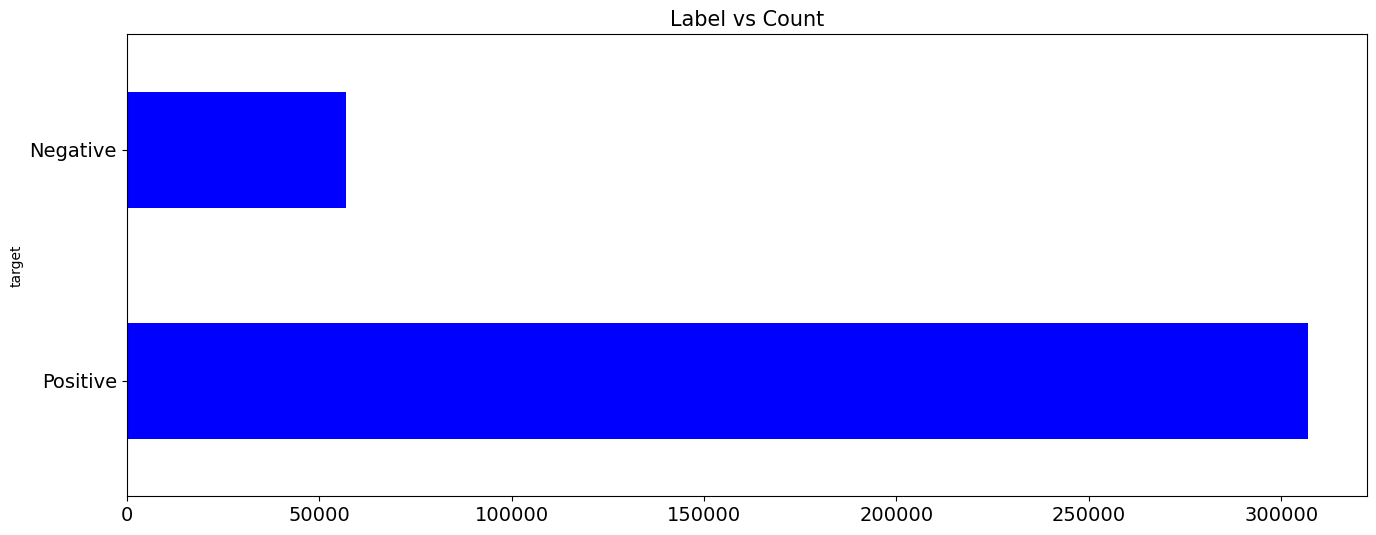

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))

vc = data.target.value_counts()
vc.plot.barh(color = "blue", fontsize = 14, ax = ax)
ax.set_title("Label vs Count", fontsize = 15)
plt.show()

In [13]:
data.loc[data.target == "Negative"].shape[0]

57079

In [14]:
data.loc[data.target == "Positive"].shape[0]

306805

### Down sampling (remove some positive and negative reviews)

In [15]:
# Count of negative samples
negative_count = data.loc[data.target == "Negative"].shape[0]

# Sample the same number of positive samples
positive = data.loc[data.target == "Positive"].sample(negative_count)

# Select all negative samples
negative = data.loc[data.target == "Negative"]

# Concatenate the dataframe
data = pd.concat([positive, negative])

In [16]:
data.shape

(114158, 11)

### Target distribution (after)

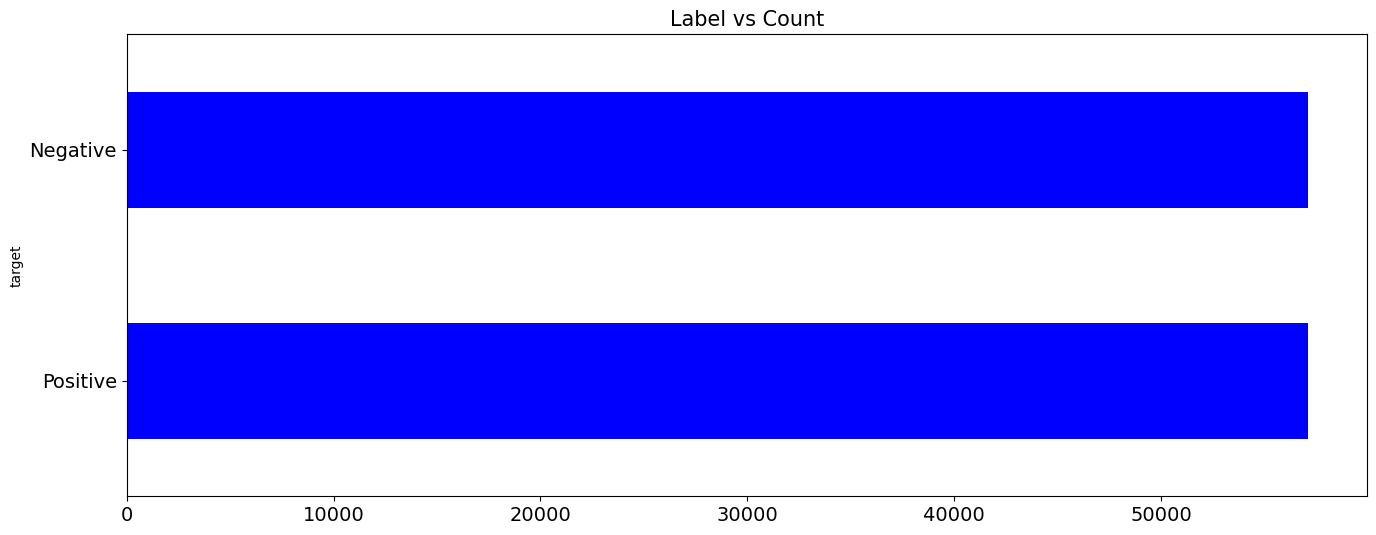

In [17]:
fig, ax = plt.subplots(figsize = (16, 6))

vc = data.target.value_counts()
vc.plot.barh(color = "blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

<h2 style = "font-size:25px; font-family:Livvic ; font-weight : bold; background-color: #a46b51; color :#fffae6   ; text-align: center; border-radius: 5px 5px; padding: 5px">Data Pre-processing</h2>

### Stop words

In [18]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

final_stopwords.add("one")
print(final_stopwords)

{'in', 'between', "you're", 'because', 'below', 've', 'and', 'then', 'itself', 'than', 'haven', 'other', 'he', 'off', 'on', 'all', 'through', 'didn', 'mightn', 'him', 'hers', 'at', 'this', 'with', 'y', 'has', 'it', 'few', 'wasn', 'their', 'needn', "you'll", 'is', 'couldn', 'aren', 'under', 'more', 'those', 'doesn', 'there', 'his', 'shouldn', "it's", 'should', "that'll", 'above', 'here', 'had', "she's", 't', 'mustn', 'will', 'that', 'these', 'its', 'm', 'whom', 'what', 'each', 'before', 'to', 'theirs', 'into', 'hadn', 'me', 'o', 'herself', 'only', 'my', 'who', 'myself', 'were', 'as', 'again', 'of', 'your', "should've", 'but', 'against', 'why', 'can', 'isn', 'll', 'down', 'about', 'wouldn', 'up', 'if', 'for', 'ourselves', 'most', 'how', 'out', 'hasn', 'been', 'you', 'after', 'while', 'once', 'won', 'yourselves', 'where', 'ain', "you've", 'she', 'our', 'they', 'ours', 'did', 'we', 'too', 'weren', 's', 'have', 'from', 'own', 'during', 'a', 'shan', 'the', 'just', 'don', 'do', 'themselves', 

### Remove unwanted words from reviews
#### Ex. html tags, punctuation, stop words, etc..

In [19]:
#stemming object
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")
# ---------------------------------------------

In [20]:
def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)

    # remove digits
    review = review.translate(remove_digits)

    # lower case all letters
    review = review.lower()

    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()

    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]

    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])

    return review

In [21]:
print("Before preprocessing : ")
data.Text.iloc[6]

Before preprocessing : 


"This seems much less chemically, and is fresher tasting, than other canned or foil-pouch packed poultry products I've tried.<br /><br />I'm old enough to remember when cans were packed full of the actual product on the label, so it's really annoying that most cans I buy now are about half full of product, with the rest of the can being filled with liquid.<br /><br />However, these cans are much fuller than other brands I've tried.  The liquid is broth, and it seems to keep the chicken meat flavorful and in good condition.  The chunks are of a generally nice, useful size.  The meat doesn't tend to disintegrate or mush, like other canned chicken brands I've tried.  The meat also was not stringy, dry or of a bad texture.  It really was a very noticeable improvement over the other brands.<br /><br />I will keep this product on hand as a staple in my pantry."

In [22]:
# apply preprocessing function

data.Text = data.Text.apply(preprocessor)
print("After preprocessing : ")
data.Text.iloc[6]

After preprocessing : 


'seem much less chemic fresher tast can foilpouch pack poultri product ive triedim old enough rememb can pack full actual product label realli annoy can buy now half full product rest fill liquidhowev can much fuller brand ive tri liquid broth seem keep chicken meat flavor good condit chunk gener nice use size meat doesnt tend disintegr mush like can chicken brand ive tri meat also not stringi dri bad textur realli notic improv brandsi keep product hand stapl pantri'

<h2 style = "font-size:25px; font-family:Livvic ; font-weight : bold; background-color: #a46b51; color :#ffefe5   ; text-align: center; border-radius: 5px 5px; padding: 5px">Word clouds</h2>

In [23]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(stopwords = stopwords, background_color = 'white')
    wordcloud.generate(text)

    plt.figure(figsize = (15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    return plt.show()

### Word cloud for positive reviews

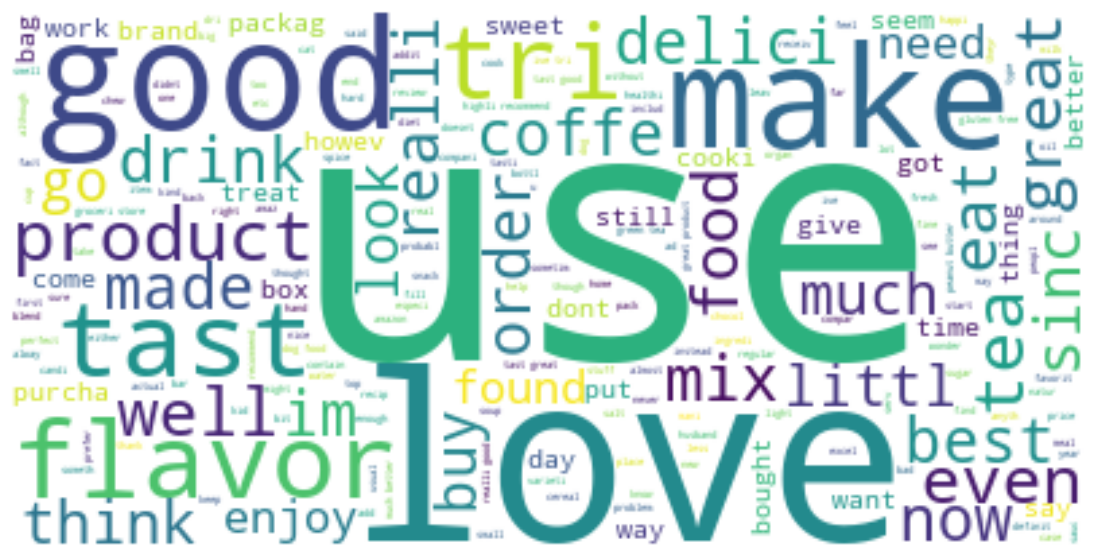

In [24]:
pos = data.loc[data.target == "Positive"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

### Word cloud for negative reviews

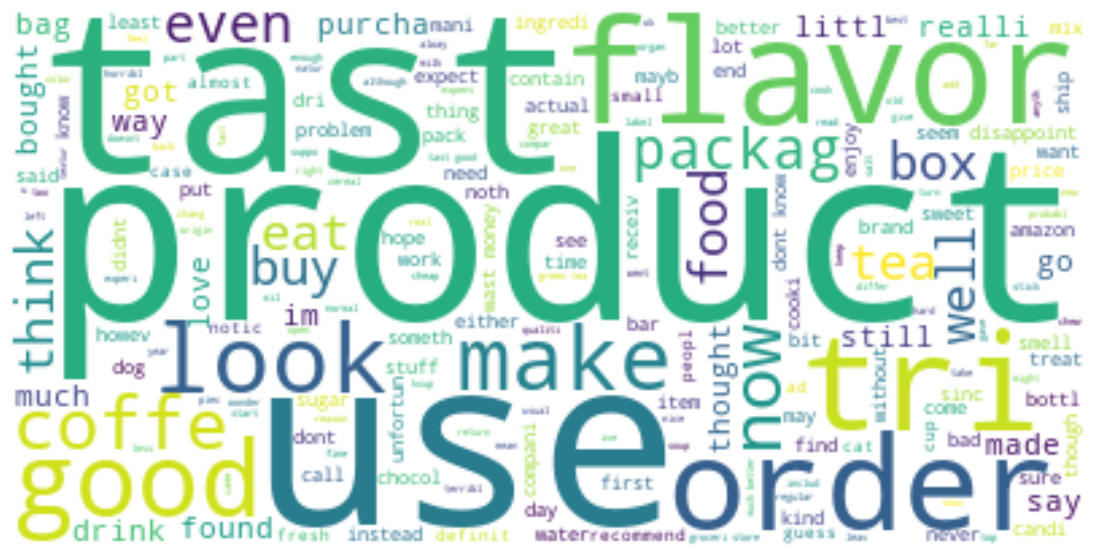

In [25]:
pos = data.loc[data.target=="Negative"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

### Examples for positive and negative reviews

In [26]:
pd.set_option('display.max_colwidth', None)
data[['Score', 'target', 'Text']].sample(5)

,Score,target,Text
170139,5,Positive,great tree came pack well reciev fast durabl chameleon love goe well cagethank
21544,2,Negative,suppos clean teeth right well would assum held chew littl border terrier not colli eat minut fast use teeth almost fast caus concern digest tract bummer suppos great pup teeth agress chewer defeat greeni that
15376,5,Positive,local store stop carri item order bulk via amazon price right tast great wife need glutenfre dont mind glutenfre long brand use other mushi tasteless
122924,5,Positive,make cake winter holiday bake jelli roll pan roll cool unrol sprinkl powder sugar mix frost tub cool whip spread frost roll top lttle frost caramel almond everyon ask cake becom favorit home road not sweet fresh light tast star
178694,2,Negative,ingredi whole ground corn poultri byproduct meal corn gluten meal soybean meal whole wheat anim fat preserv mix tocopherol meat bone meal chicken turkey anim digest caramel color salt phosphor acid cholin chlorid titanium dioxid vitamin vitamin e supplement vitamin supplement niacin supplement dcalcium pantothen thiamin mononitr riboflavin supplement pyridoxin hydrochlorid menadion sodium bisulfit complex vitamin supplement folic acid biotin vitamin b supplement potassium chlorid miner ferrou sulfat zinc oxid mangan oxid copper sulfat calcium iodat sodium selenit red taurin yellow potassium sorbat use preserv yellow bha use preserv blue rosemari extract


<h2 style = "font-size:25px; font-family:Livvic ; font-weight : bold; background-color: #a46b51; color :#fffae6   ; text-align: center; border-radius: 5px 5px; padding: 5px">Train Test Split</h2>

#### Train set : 80% of data
#### Test set : 20% of data

In [27]:
X = data.Text
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [28]:
X_train.shape, X_test.shape

((91326,), (22832,))

In [29]:
X_train.head

<bound method NDFrame.head of 23816                                                                                                                                                                                                                                                                                                                                              teenag daughter friend keep eat realli tasti chili lime person favorit good thing send whole case daughter say friend hook
328399                                                                                                                                                                                                                                                                                                                   first k cup like use largest set would nice chicori root mostli true flavor anyway clearli tri like bold coffe littl much burnt flavor favorit close
336590                                        

In [30]:
X_test.head

<bound method NDFrame.head of 358007                                                                                                                                                                                                                                                                                                                                                                                                       ive tri mani brand sardin find best small sardin pack well pleasant smell price also good qualiti use pack plant poland receiv highest award possibl food safeti recent eat sardin saltin cracker tabasco origin red hot sauc yum
144088                                                                                                                                                                                                                                                                                                                                                     

<h2 style = "font-size:25px; font-family:Livvic ; font-weight : bold; background-color: #a46b51; color :#ffefe5   ; text-align: center; border-radius: 5px 5px; padding: 5px">Vectorization</h2>

### TF-IDF Vectorizer

In [31]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)

# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

###  Label Encoding

In [32]:
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

['Negative', 'Positive']


<a id="3"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #a46b51; color :#fffae6   ; text-align: center; border-radius: 5px 5px; padding: 7px">3. Model Training</h2>

### Logistic Regression classifier with Tf-Idf

In [33]:
log_model = LogisticRegression(C=1e5).fit(tfidf_X_train, y_train)
y_pred_log = log_model.predict(tfidf_X_test)

### Multinomial Naive Bayes classifier with Tf-Idf

In [34]:
multinomial_model = MultinomialNB().fit(tfidf_X_train, y_train)
y_pred_multinomial = multinomial_model.predict(tfidf_X_test)

###  Bernoulli Naive Bayes with Tf-Idf

In [35]:
bernoulli_model = BernoulliNB().fit(tfidf_X_train, y_train)
y_pred_bernoulli = bernoulli_model.predict(tfidf_X_test)

<a id="4"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #a46b51; color :#ffefe5   ; text-align: center; border-radius: 5px 5px; padding: 7px">4. Model Evaluation</h2>

###  Confusion Matrix

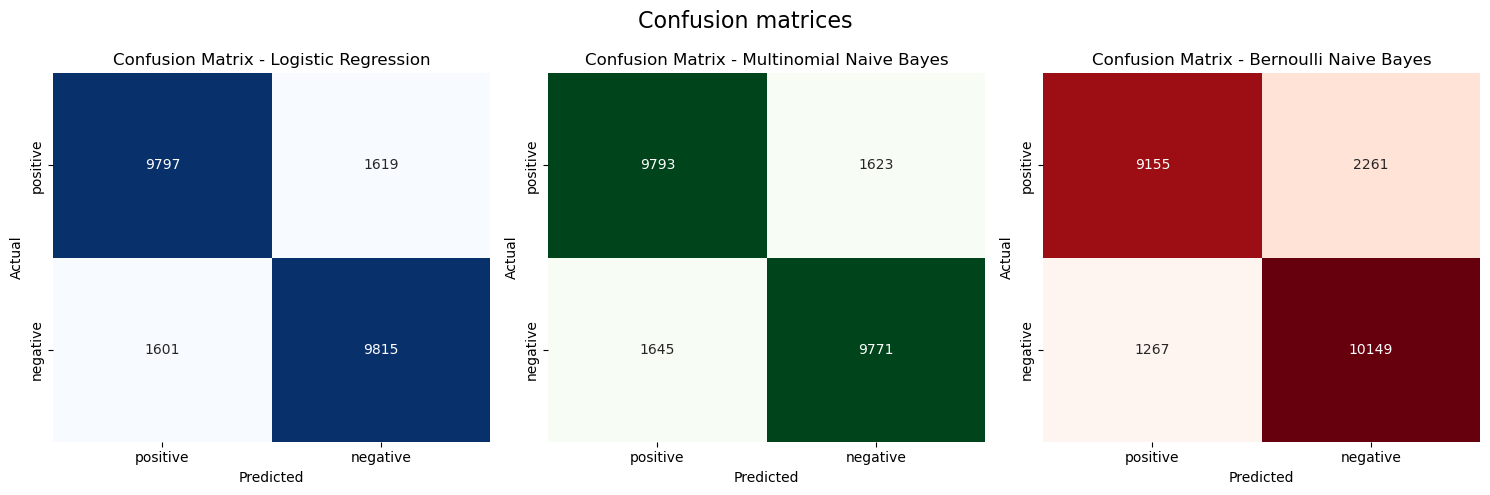

In [36]:
# Confusion matrix for Logistic Regression
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Confusion matrix for Multinomial Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_multinomial)

# Confusion matrix for Bernoulli Naive Bayes
conf_matrix_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)

# Plotting confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=100)

sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax1)
ax1.set_title('Confusion Matrix - Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_xticklabels(["positive", "negative"])
ax1.set_yticklabels(["positive", "negative"])

sns.heatmap(conf_matrix_nb, annot=True, cmap='Greens', fmt='d', cbar=False, ax=ax2)
ax2.set_title('Confusion Matrix - Multinomial Naive Bayes')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_xticklabels(["positive", "negative"])
ax2.set_yticklabels(["positive", "negative"])

sns.heatmap(conf_matrix_bernoulli, annot=True, cmap='Reds', fmt='d', cbar=False, ax=ax3)
ax3.set_title('Confusion Matrix - Bernoulli Naive Bayes')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')
ax3.set_xticklabels(["positive", "negative"])
ax3.set_yticklabels(["positive", "negative"])

fig.suptitle("Confusion matrices", fontsize=16)
plt.tight_layout()
plt.show()

### Classification Report

In [37]:
print('Classification Report:')

# Logistic Regression
print('Logistic Regression')
print(classification_report(y_test, y_pred_log))

# Multinomial Naive Bayes
print('\nMultinomial Naive Bayes')
print(classification_report(y_test, y_pred_multinomial))

# Bernoulli Naive Bayes
print('\nBernoulli Naive Bayes')
print(classification_report(y_test, y_pred_bernoulli))

Classification Report:
Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     11416
           1       0.86      0.86      0.86     11416

    accuracy                           0.86     22832
   macro avg       0.86      0.86      0.86     22832
weighted avg       0.86      0.86      0.86     22832


Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     11416
           1       0.86      0.86      0.86     11416

    accuracy                           0.86     22832
   macro avg       0.86      0.86      0.86     22832
weighted avg       0.86      0.86      0.86     22832


Bernoulli Naive Bayes
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     11416
           1       0.82      0.89      0.85     11416

    accuracy                           0.85     22832
   macro avg       0.85      0.85    

### Model Accuracy

In [38]:
accuracy = {}

# Calculate accuracy for each model
accuracy['Logistic Regression'] = accuracy_score(y_test, y_pred_log)
accuracy['Multinomial Naive Bayes'] = accuracy_score(y_test, y_pred_multinomial)
accuracy['Bernoulli Naive Bayes'] = accuracy_score(y_test, y_pred_bernoulli)

# Create a datafame to display the accuracies
accuracy_table = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Accuracy'])
accuracy_table

,Model,Accuracy
0,Logistic Regression,0.858970
1,Multinomial Naive Bayes,0.856868
2,Bernoulli Naive Bayes,0.845480


### ROC-AUC Curve

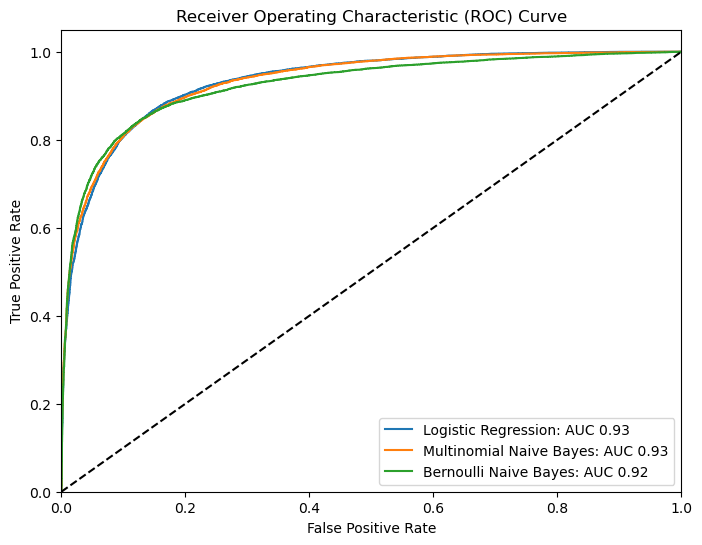

In [39]:
# Predictions for classifiers stored in 'predictions' dictionary
predictions = {
    'Logistic Regression': log_model.predict_proba(tfidf_X_test)[:, 1],
    'Multinomial Naive Bayes': multinomial_model.predict_proba(tfidf_X_test)[:, 1],
    'Bernoulli Naive Bayes': bernoulli_model.predict_proba(tfidf_X_test)[:, 1]}

# Plotting ROC curves for each classifier
plt.figure(figsize=(8, 6))

for model, predicted_probs in predictions.items():
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, predicted_probs)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(
        false_positive_rate, 
        true_positive_rate, 
        label='%s: AUC %0.2f' % (model, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<a id="5"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #a46b51; color :#ffefe5   ; text-align: center; border-radius: 5px 5px; padding: 7px">5. Model Deployment</h2>

### Save model & transformer

In [40]:
bmodel = MultinomialNB()
bmodel.fit(tfidf_X_train, y_train)

# Save the model
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(bmodel, f)

In [41]:
with open("transformer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
    
with open("model.pkl", "wb") as f:
    pickle.dump(bmodel, f)

### Prediction on single review

In [42]:
# Labels = ['Negative', 'Neutral', 'Positive']
def get_sentiment(review):
    # preprocessing
    x = preprocessor(review)
    #vectorization
    x = tfidf_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [43]:
# Positive review
review = "This chips packet is very tasty. I highly recommend this!"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [44]:
# Negative review
review = "This product is a waste of money. Don't buy this!!"
print(f"This is a {get_sentiment(review)} review!")

This is a Negative review!
